<a href="https://colab.research.google.com/github/rubygitflow/Sequence-to-Sequence-training-models/blob/master/University_of_Artificial_Intelligence_NLP_HomeWork_6_Lite_1_Seq2Seq_Lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP.Lesson 6.Seq2Seq. Lemmatization

In [ ]:
pip install pymorphy2

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 7.1MB 7.7MB/s 


In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, GlobalMaxPooling1D, LSTM, GRU, Bidirectional, Embedding, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import RMSprop, Adam

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pymorphy2

## Checking the GPU

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import os
import psutil
import humanize
import GPUtil as GPU
GPUs = GPU.getGPUs()
if len(GPUs)>0:
  gpu = GPUs[0]
else:
  print('GPU turned off')
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM FREE: "+humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  if len(GPUs)>0:
    print("Gen RAM FREE: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
    print("GPU Model: " + gpu.name)

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=29de2bc2492b0b05db8e1e585fe41f8ba70dcc06f6efe175d33b73c1d0d0dfd1
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM FREE: 12.7 GB  | Proc size: 365.9 MB
Gen RAM FREE: 7611MB | Used: 0MB | Util   0% | Total 7611MB
GPU Model: Tesla P4


## Data Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Базы/NLP/(Стругацкие) Тестовая_2 вместе.txt', 'r') as f:
  text = f.read()
  text = text.replace('\ufeff', '')  
  text = re.sub(r'[^А-я\n]', ' ', text)
  text = ' '.join(text.split())

In [ ]:
text

In [ ]:
words = list(set(text.lower().split(' ')))
len(words)

24099

In [ ]:
words[:20]

['страшными',
 'драгоценное',
 'приступил',
 'идеей',
 'покидали',
 'принялось',
 'выраженной',
 'наперерез',
 'попытаться',
 'рнутый',
 'заберут',
 'броска',
 'хирурга',
 'получив',
 'допросе',
 'давшая',
 'кровью',
 'грэйсток',
 'самих',
 'накатило']

In [ ]:
init_words = ['<'+word for word in words]

In [ ]:
init_words

['<страшными',
 '<драгоценное',
 '<приступил',
 '<идеей',
 '<покидали',
 '<принялось',
 '<выраженной',
 '<наперерез',
 '<попытаться',
 '<рнутый',
 '<заберут',
 '<броска',
 '<хирурга',
 '<получив',
 '<допросе',
 '<давшая',
 '<кровью',
 '<грэйсток',
 '<самих',
 '<накатило',
 '<хлопает',
 '<научился',
 '<круг',
 '<промывать',
 '<кресте',
 '<восстанавливать',
 '<райский',
 '<тупоголовый',
 '<останавливаясь',
 '<муху',
 '<признес',
 '<реванш',
 '<размахивала',
 '<джи',
 '<зной',
 '<темноту',
 '<ситуацией',
 '<поумнеешь',
 '<древних',
 '<снежную',
 '<широкое',
 '<осталось',
 '<ложку',
 '<свининой',
 '<кипящем',
 '<массаж',
 '<таится',
 '<акрабой',
 '<земле',
 '<африки',
 '<поливая',
 '<фраке',
 '<пересохшие',
 '<чрезвычайно',
 '<мал',
 '<босых',
 '<кровинки',
 '<освещ',
 '<закончено',
 '<стаканом',
 '<прибудет',
 '<погода',
 '<счастьем',
 '<лопнувшей',
 '<проклятые',
 '<полка',
 '<выпить',
 '<биток',
 '<проклял',
 '<лозунг',
 '<кулак',
 '<ученика',
 '<городишке',
 '<радешенек',
 '<прохладным

In [ ]:
len(init_words)

24099

In [ ]:
num_chars = 34 #33 буквы - ё + begin+end
tokenizer = Tokenizer(num_words=num_chars, char_level=True) #русский алфавит без ё
tokenizer.fit_on_texts(init_words)

In [ ]:
maxlen = max([len(i) for i in words])
maxlen

24

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
lemmas = [morph.parse(word)[0].normal_form for word in words]

In [ ]:
dec_in_words = ['<'+lemma for lemma in lemmas]

In [ ]:
dec_in_words[:20]

['<страшный',
 '<драгоценный',
 '<приступить',
 '<идея',
 '<покидать',
 '<приняться',
 '<выразить',
 '<наперерез',
 '<попытаться',
 '<рнуть',
 '<забрать',
 '<бросок',
 '<хирург',
 '<получить',
 '<допрос',
 '<дать',
 '<кровь',
 '<грэйсток',
 '<сам',
 '<накатить']

In [ ]:
dec_out_words = [lemma+'>' for lemma in lemmas]

In [ ]:
dec_out_words[:20]

['страшный>',
 'драгоценный>',
 'приступить>',
 'идея>',
 'покидать>',
 'приняться>',
 'выразить>',
 'наперерез>',
 'попытаться>',
 'рнуть>',
 'забрать>',
 'бросок>',
 'хирург>',
 'получить>',
 'допрос>',
 'дать>',
 'кровь>',
 'грэйсток>',
 'сам>',
 'накатить>']

In [ ]:
tokenizer.fit_on_texts(dec_in_words)
tokenizer.fit_on_texts(dec_out_words)

In [ ]:
tokenizer.index_word

{1: 'о',
 2: '<',
 3: 'а',
 4: 'т',
 5: 'и',
 6: 'е',
 7: 'н',
 8: 'с',
 9: 'р',
 10: '>',
 11: 'ь',
 12: 'в',
 13: 'л',
 14: 'п',
 15: 'к',
 16: 'д',
 17: 'у',
 18: 'ы',
 19: 'й',
 20: 'м',
 21: 'я',
 22: 'з',
 23: 'б',
 24: 'г',
 25: 'ч',
 26: 'ж',
 27: 'ш',
 28: 'х',
 29: 'ц',
 30: 'ю',
 31: 'щ',
 32: 'ф',
 33: 'э',
 34: 'ё',
 35: 'ъ'}

In [ ]:
Xtrain_enc = pad_sequences(tokenizer.texts_to_sequences(init_words), maxlen=maxlen+1, padding='post')

In [ ]:
Xtrain_enc.shape

(24099, 25)

In [ ]:
Xtrain_enc[0]

array([ 2,  8,  4,  9,  3, 27,  7, 18, 20,  5,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
Xtrain_dec = pad_sequences(tokenizer.texts_to_sequences(dec_in_words), maxlen=maxlen+1, padding='post')

In [ ]:
Xtrain_dec.shape

(24099, 25)

In [ ]:
Xtrain_dec[0]

array([ 2,  8,  4,  9,  3, 27,  7, 18, 19,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
Ytrain_dec = pad_sequences(tokenizer.texts_to_sequences(dec_out_words), maxlen=maxlen+1, padding='post')

In [ ]:
Ytrain_dec[0]

array([ 8,  4,  9,  3, 27,  7, 18, 19, 10,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
Ytrain_dec.shape

(24099, 25)

In [ ]:
Ytrain_dec = to_categorical(Ytrain_dec, num_chars) # converting to one hot vector

In [ ]:
Ytrain_dec.shape

(24099, 25, 34)

## Modelling

In [ ]:
#encoder:
emb_size = 128
hidden_LSTM_dim = 64

enc_input = Input((None,))
emb = Embedding(num_chars, emb_size)(enc_input)
y, h, c = LSTM(hidden_LSTM_dim, return_state=True)(emb)

encoder = Model(inputs=enc_input, outputs=[y,h,c])

In [ ]:
encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         4352      
_________________________________________________________________
lstm (LSTM)                  [(None, 64), (None, 64),  49408     
Total params: 53,760
Trainable params: 53,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder(Xtrain_enc)

[<tf.Tensor: shape=(24099, 64), dtype=float32, numpy=
 array([[-0.0365972 , -0.0004977 , -0.00282545, ..., -0.00927777,
         -0.01881602, -0.00190099],
        [-0.0367302 , -0.00011501, -0.00096598, ..., -0.00553345,
         -0.01921975, -0.00030018],
        [-0.0368563 , -0.00125543, -0.00236879, ..., -0.00774989,
         -0.01990191, -0.00132117],
        ...,
        [-0.03697032, -0.00238497, -0.003033  , ..., -0.0097774 ,
         -0.02019222, -0.00240155],
        [-0.03637709, -0.00115972, -0.00118956, ..., -0.00755592,
         -0.01870494, -0.00198526],
        [-0.03701267, -0.00196665, -0.00297418, ..., -0.0092028 ,
         -0.02012417, -0.00179197]], dtype=float32)>,
 <tf.Tensor: shape=(24099, 64), dtype=float32, numpy=
 array([[-0.0365972 , -0.0004977 , -0.00282545, ..., -0.00927777,
         -0.01881602, -0.00190099],
        [-0.0367302 , -0.00011501, -0.00096598, ..., -0.00553345,
         -0.01921975, -0.00030018],
        [-0.0368563 , -0.00125543, -0.0023687

In [ ]:
dec_input = Input((None,))
h_input = Input((hidden_LSTM_dim,))
c_input = Input((hidden_LSTM_dim,))

dec_emb = Embedding(num_chars, emb_size)(dec_input)
dec_y, dec_h, dec_c = LSTM(hidden_LSTM_dim, return_sequences=True, return_state=True)(dec_emb, initial_state=[h_input, c_input])
out = Dense(num_chars, activation='softmax')(dec_y)

decoder = Model(inputs=[dec_input, h_input, c_input], outputs=out)

In [ ]:
decoder.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 128)    4352        input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 64)]         0                                            
_______________________________________________________________________________________

In [ ]:
[Xtrain_dec, *encoder(Xtrain_enc)[1:]]

[array([[ 2,  8,  4, ...,  0,  0,  0],
        [ 2, 16,  9, ...,  0,  0,  0],
        [ 2, 14,  9, ...,  0,  0,  0],
        ...,
        [ 2, 20,  3, ...,  0,  0,  0],
        [ 2,  7,  6, ...,  0,  0,  0],
        [ 2,  7,  3, ...,  0,  0,  0]], dtype=int32),
 <tf.Tensor: shape=(24099, 64), dtype=float32, numpy=
 array([[-0.0365972 , -0.0004977 , -0.00282545, ..., -0.00927777,
         -0.01881602, -0.00190099],
        [-0.0367302 , -0.00011501, -0.00096598, ..., -0.00553345,
         -0.01921975, -0.00030018],
        [-0.0368563 , -0.00125543, -0.00236879, ..., -0.00774989,
         -0.01990191, -0.00132117],
        ...,
        [-0.03697032, -0.00238497, -0.003033  , ..., -0.0097774 ,
         -0.02019222, -0.00240155],
        [-0.03637709, -0.00115972, -0.00118956, ..., -0.00755592,
         -0.01870494, -0.00198526],
        [-0.03701267, -0.00196665, -0.00297418, ..., -0.0092028 ,
         -0.02012417, -0.00179197]], dtype=float32)>,
 <tf.Tensor: shape=(24099, 64), dtype=flo

In [ ]:
# Тождественная запись (см. выше)
[Xtrain_dec] + encoder(Xtrain_enc)[1:]

[array([[ 2,  8,  4, ...,  0,  0,  0],
        [ 2, 16,  9, ...,  0,  0,  0],
        [ 2, 14,  9, ...,  0,  0,  0],
        ...,
        [ 2, 20,  3, ...,  0,  0,  0],
        [ 2,  7,  6, ...,  0,  0,  0],
        [ 2,  7,  3, ...,  0,  0,  0]], dtype=int32),
 <tf.Tensor: shape=(24099, 64), dtype=float32, numpy=
 array([[-0.0365972 , -0.0004977 , -0.00282545, ..., -0.00927777,
         -0.01881602, -0.00190099],
        [-0.0367302 , -0.00011501, -0.00096598, ..., -0.00553345,
         -0.01921975, -0.00030018],
        [-0.0368563 , -0.00125543, -0.00236879, ..., -0.00774989,
         -0.01990191, -0.00132117],
        ...,
        [-0.03697032, -0.00238497, -0.003033  , ..., -0.0097774 ,
         -0.02019222, -0.00240155],
        [-0.03637709, -0.00115972, -0.00118956, ..., -0.00755592,
         -0.01870494, -0.00198526],
        [-0.03701267, -0.00196665, -0.00297418, ..., -0.0092028 ,
         -0.02012417, -0.00179197]], dtype=float32)>,
 <tf.Tensor: shape=(24099, 64), dtype=flo

In [ ]:
result = decoder([Xtrain_dec] + encoder(Xtrain_enc)[1:])
result

<tf.Tensor: shape=(24099, 25, 34), dtype=float32, numpy=
array([[[0.02948942, 0.02884852, 0.02919408, ..., 0.02880748,
         0.02904304, 0.03001779],
        [0.02958593, 0.02896689, 0.02884389, ..., 0.02862989,
         0.02890449, 0.02999918],
        [0.02972798, 0.02928092, 0.02902333, ..., 0.0286134 ,
         0.02928183, 0.03007963],
        ...,
        [0.02948989, 0.0284873 , 0.02869795, ..., 0.03021122,
         0.02952675, 0.03056242],
        [0.02949123, 0.02848018, 0.02870331, ..., 0.03022544,
         0.02951254, 0.03056996],
        [0.02949165, 0.02847424, 0.02870776, ..., 0.03023745,
         0.02950013, 0.03057452]],

       [[0.02953003, 0.02892486, 0.02923277, ..., 0.02877618,
         0.02903488, 0.03001405],
        [0.02983565, 0.02934599, 0.02914255, ..., 0.02893579,
         0.02907883, 0.03005032],
        [0.0298942 , 0.0289577 , 0.02921216, ..., 0.02936186,
         0.02919719, 0.03004396],
        ...,
        [0.02952164, 0.02854974, 0.02872021, ..., 0

In [ ]:
result.shape

TensorShape([24099, 25, 34])

## Training

In [ ]:
hidden_LSTM_dim = 64
emb_size = 136

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
emb_enc (Embedding)             (None, None, 136)    4624        input_7[0][0]                    
__________________________________________________________________________________________________
emb_dec (Embedding)             (None, None, 136)    4624        input_8[0][0]                    
______________________________________________________________________________________

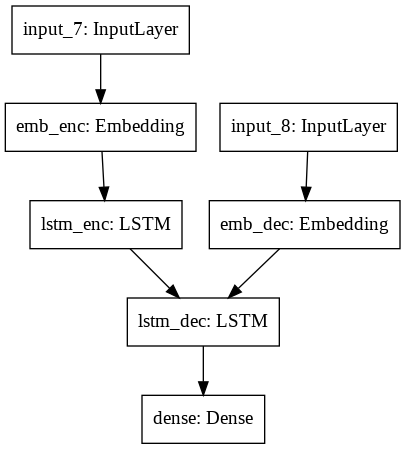

In [ ]:
######################
# First input layer, encoder
######################
encoderInputs = Input((None , )) # dimensions at the matrix input
encoderEmbedding = Embedding(num_chars, emb_size , mask_zero=True, name='emb_enc') (encoderInputs)
encoderOutputs, state_h , state_c = LSTM(hidden_LSTM_dim, return_state=True, name='lstm_enc')(encoderEmbedding)
encoderStates = [state_h, state_c]

encoder_LSTM = Model(encoderInputs, encoderStates)

######################
# Second input layer, decoder
######################
decoderInputs = Input((None, )) # dimensions at the matrix input
decoderEmbedding = Embedding(num_chars, emb_size, mask_zero=True, name='emb_dec') (decoderInputs) # mask_zero=True - ignore null padding when passing to LSTM
decoderLSTM = LSTM(hidden_LSTM_dim, return_state=True, return_sequences=True, name='lstm_dec')
decoderOutputs , _ , _ = decoderLSTM (decoderEmbedding, initial_state=encoderStates)
decoderDense = Dense(num_chars, activation='softmax', name='dense') 
output = decoderDense (decoderOutputs)

######################
# Building a neural network training model
######################
model_LSTM = Model([encoderInputs, decoderInputs], output)
model_LSTM.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

model_LSTM.summary() # information about the built neural network model
plot_model(model_LSTM, show_shapes=True) # let's build a graph for visualization of layers and connections between them (..., to_file='model.png')

In [ ]:
# Start training and save the model with LSTM-layers
history_LSTM = model_LSTM.fit([Xtrain_enc , Xtrain_dec], Ytrain_dec, batch_size=30, epochs=60, validation_split=0.2) 
# model_LSTM.save( '/content/drive/My Drive/tmp/model_LSTM_60epochs(rms).h5' )

Epoch 1/60
643/643 [==============================] - 13s 20ms/step - loss: 0.7226 - accuracy: 0.4191 - val_loss: 0.5437 - val_accuracy: 0.5581
Epoch 2/60
643/643 [==============================] - 10s 16ms/step - loss: 0.4219 - accuracy: 0.6572 - val_loss: 0.3358 - val_accuracy: 0.7266
Epoch 3/60
643/643 [==============================] - 10s 15ms/step - loss: 0.2848 - accuracy: 0.7704 - val_loss: 0.2378 - val_accuracy: 0.8107
Epoch 4/60
643/643 [==============================] - 10s 15ms/step - loss: 0.2094 - accuracy: 0.8322 - val_loss: 0.1951 - val_accuracy: 0.8430
Epoch 5/60
643/643 [==============================] - 10s 15ms/step - loss: 0.1650 - accuracy: 0.8694 - val_loss: 0.1705 - val_accuracy: 0.8602
Epoch 6/60
643/643 [==============================] - 9s 14ms/step - loss: 0.1374 - accuracy: 0.8923 - val_loss: 0.1376 - val_accuracy: 0.8895
Epoch 7/60
643/643 [==============================] - 9s 14ms/step - loss: 0.1190 - accuracy: 0.9064 - val_loss: 0.1282 - val_accuracy: 0

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.grid(True)
  plt.show()

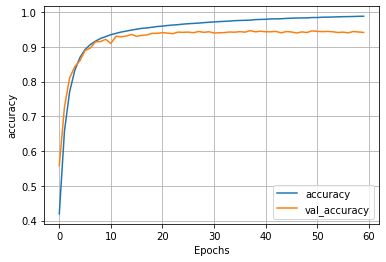

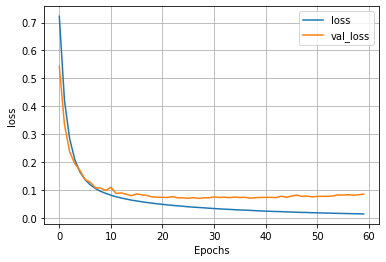

In [ ]:
plot_graphs(history_LSTM, "accuracy")
plot_graphs(history_LSTM, "loss")

## Testing

In [ ]:
decoder_input = Input((None,))
h_input = Input((hidden_LSTM_dim,))
c_input = Input((hidden_LSTM_dim,))

states = [h_input, c_input]
# insert the newly calculated weights into the neural network layer
dec_emb = Embedding(num_chars, emb_size, weights=model_LSTM.get_layer(name='emb_dec').get_weights())(decoder_input)
lstm, h, c = LSTM(hidden_LSTM_dim, return_state=True, weights=model_LSTM.get_layer(name='lstm_dec').get_weights())(dec_emb, initial_state=states)
out = Dense(num_chars, activation='softmax', weights=model_LSTM.get_layer(name='dense').get_weights(), name='dense')(lstm)

decoder_LSTM = Model([decoder_input]+states, [out, h, c])

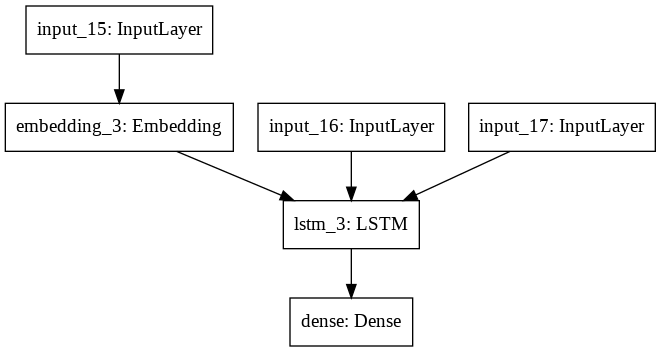

In [ ]:
plot_model(decoder_LSTM)

In [ ]:
np.all(decoder_LSTM.get_layer(name='dense').get_weights()[1] == model_LSTM.get_layer(name='dense').get_weights()[1])

True

In [ ]:
# function of prediction 
def decode_word(input_word): # input word from tokens

  # returning the state [h, c]
  states = encoder_LSTM.predict(input_word)

  prev_token = np.zeros((1,1))
  # assign a value to the first character "start"
  prev_token[0,0] = tokenizer.word_index['<']


  # stop flag
  Flag = False
  # reset the word
  decoded_word = ''

  while not Flag:
    pred, *states= decoder_LSTM.predict([prev_token] + states)
    
    # converting the decoded token to a character 
    next_token = np.argmax(pred, axis=-1) #

    sampled_char = tokenizer.sequences_to_texts([next_token])[0]

    decoded_word += sampled_char

    # if we find the last character in the word or exceed the length of the word
    if (sampled_char == '>' or
      len(decoded_word) > maxlen+1):
      print(pred.shape)
      Flag = True

    prev_token[0,0] = next_token

  return decoded_word

In [ ]:
sent = 'вызывали'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
вызывать>


In [ ]:
sent = 'курсов'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
курс>


In [ ]:
sent = 'смотрибельного'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
смотриберать>


In [ ]:
sent = 'вишневого'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
виншовый>


In [ ]:
sent = 'вечными'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
вечный>


In [ ]:
sent = 'оконных'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
оконный>


In [ ]:
sent = 'смотря'
sent = '<' + sent
x = pad_sequences(tokenizer.texts_to_sequences([sent]), maxlen=maxlen, padding='post', truncating='post')
print(decode_word(x))

(1, 34)
смотреть>
